In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import networkx as nx
import pprint
import numpy as np
import operator
from collections import OrderedDict
import re
from collections import Counter
import json
import matplotlib.pyplot as plt
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly import graph_objs as go

In [2]:

def get_df():
    data_loc = './../../data'
    data_file = 'cleaned_data_2.xlsx'
    data_path = data_loc + '/' + data_file
    df = pd.read_excel(data_path)

    return df

Number of nodes 589


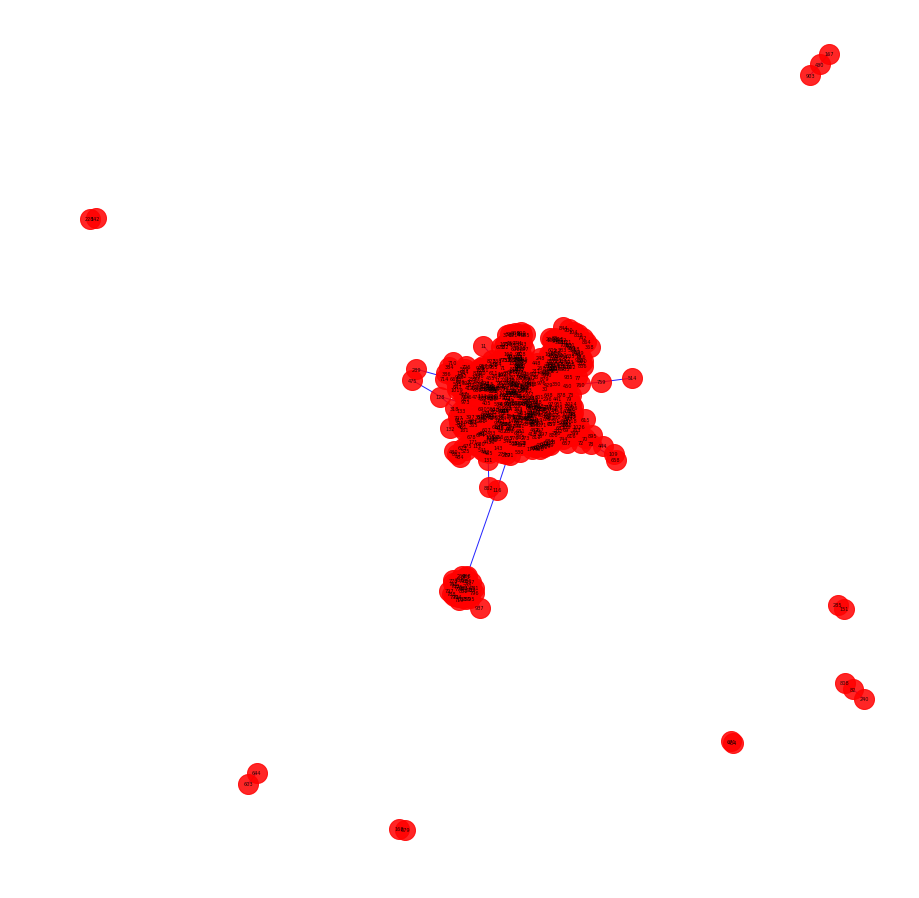

In [3]:

def analyze_4():

    df = get_df()
    all_hs_codes = set(df['hs_code'])

    s = list(df['shipper_id'])
    c = list(df['consignee_id'])
    all_companies = list(set(s+c))
    G = nx.Graph()

    # create the graph nodes
    G.add_nodes_from(all_companies)
    print 'Number of nodes', G.number_of_nodes()

    # Local function
    def group_by_hs_code(tmp_df, hs_code):
        _tmp_df = pd.DataFrame(tmp_df,copy=True)
        # print '------------'
        # print '>> ',hs_code

        def _aux_filter(row, _hs):
            _hs = str(_hs)
            h = str(row['hs_code'])
            m = re.match(_hs, h)
            if m is not None and m.group(0) != '' :
                return _hs
            else :
                return None

        _tmp_df['hs_code'] = _tmp_df.apply(_aux_filter,axis = 1,_hs = hs_code )
        _tmp_df = _tmp_df[_tmp_df.hs_code.notnull()]

        if len(_tmp_df) == 0 :
            print tmp_df[tmp_df['hs_code']==int(_hs)]

        return _tmp_df



    for _hs in all_hs_codes :
        tmp_df = pd.DataFrame(df,copy=True)
        tmp_df = group_by_hs_code(tmp_df,_hs)
        # print  _hs, ' | ', len(tmp_df)

        companies_c = tmp_df['consignee_id']
        companies_s = tmp_df['shipper_id']

        for c, s in zip(companies_c, companies_s):

            if not G.has_node(c):
                G.add_node(c)
            if not G.has_node(s):
                G.add_node(s)
            if not G.has_edge(s, c):
                G.add_edge(s, c, weight=1)
            else:
                e = G.get_edge_data(s, c)
                count = e['weight']
                count += 1
                attr = {(s, c): {'weight': count}}
                nx.set_edge_attributes(G, attr)

    node_label_dict = {}

    for i in all_companies :
        node_label_dict[i] =  str(i)
        
    plt.figure(figsize=[12,12])
   
    # nx.draw_networkx_nodes(G, pos=nx.spring_layout(G),color='r',node_size=75 )
    # nx.draw_networkx_edges(G,pos=nx.spring_layout(G), width=0.15,edge_color='b',alpha=0.75)
    nx.draw_spring(G,
                   node_size=400,
                   node_color='r',
                   edge_color='b',
                   alpha=0.85,
                   labels = node_label_dict,
                   font_size = 5
    )
    plt.show()



analyze_4()


A graph is created with the nodes as the companies. 
An edge is added if there is a record with company u and comapny v trading an item in the same HS code.
It is evident there is a clustered structure.


Now to analyze, how companies which are trading items in the same HS code are connected.


--------------------------------------------------------
HS code  440320  Number of nodes  5  Number of Edges  4
Number of Connected Components  1
Largest Component size  5
Smallest Component size  5


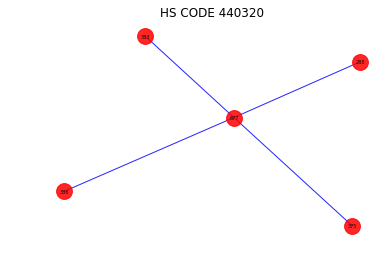

--------------------------------------------------------
HS code  441600  Number of nodes  11  Number of Edges  9
Number of Connected Components  2
Largest Component size  9
Smallest Component size  2


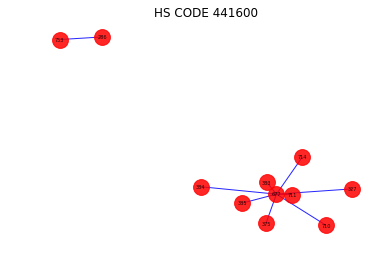

--------------------------------------------------------
HS code  440710  Number of nodes  22  Number of Edges  15
Number of Connected Components  7
Largest Component size  7
Smallest Component size  2


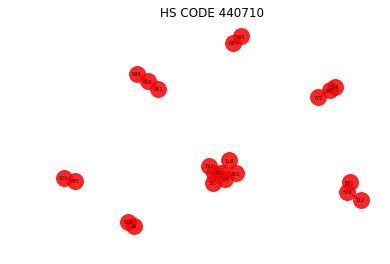

--------------------------------------------------------
HS code  440200  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


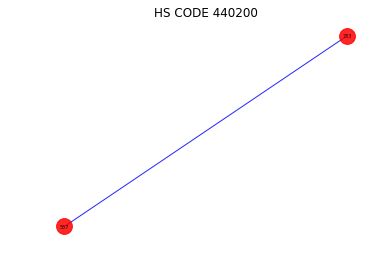

--------------------------------------------------------
HS code  440920  Number of nodes  487  Number of Edges  678
Number of Connected Components  5
Largest Component size  452
Smallest Component size  2


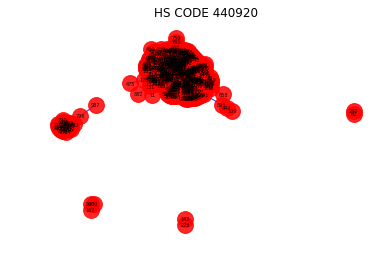

--------------------------------------------------------
HS code  440723  Number of nodes  6  Number of Edges  3
Number of Connected Components  3
Largest Component size  2
Smallest Component size  2


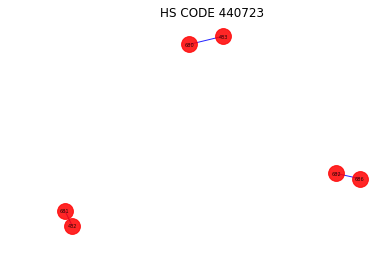

--------------------------------------------------------
HS code  44182  Number of nodes  35  Number of Edges  25
Number of Connected Components  10
Largest Component size  11
Smallest Component size  2


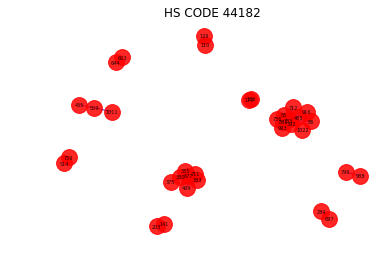

--------------------------------------------------------
HS code  442010  Number of nodes  7  Number of Edges  4
Number of Connected Components  3
Largest Component size  3
Smallest Component size  2


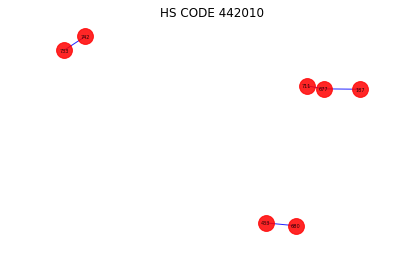

--------------------------------------------------------
HS code  44079  Number of nodes  111  Number of Edges  104
Number of Connected Components  14
Largest Component size  64
Smallest Component size  2


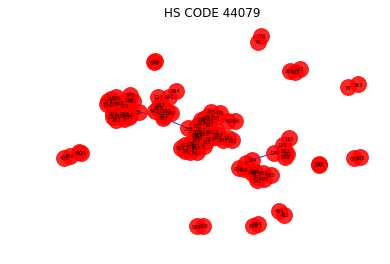

--------------------------------------------------------
HS code  44189  Number of nodes  14  Number of Edges  10
Number of Connected Components  4
Largest Component size  8
Smallest Component size  2


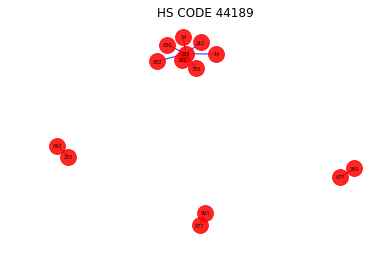

--------------------------------------------------------
HS code  441890  Number of nodes  14  Number of Edges  10
Number of Connected Components  4
Largest Component size  8
Smallest Component size  2


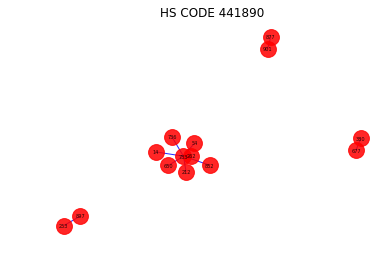

--------------------------------------------------------
HS code  441510  Number of nodes  7  Number of Edges  4
Number of Connected Components  3
Largest Component size  3
Smallest Component size  2


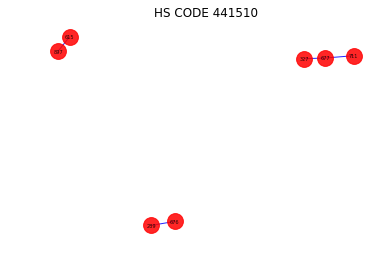

--------------------------------------------------------
HS code  44071  Number of nodes  23  Number of Edges  16
Number of Connected Components  7
Largest Component size  8
Smallest Component size  2


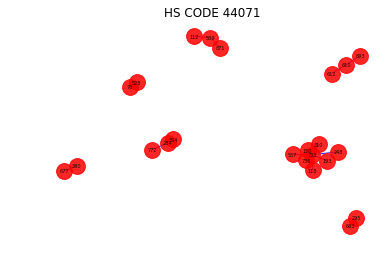

--------------------------------------------------------
HS code  441900  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


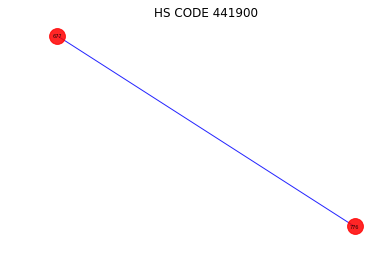

--------------------------------------------------------
HS code  401693  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


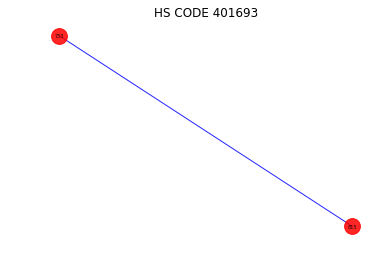

--------------------------------------------------------
HS code  441520  Number of nodes  8  Number of Edges  5
Number of Connected Components  3
Largest Component size  4
Smallest Component size  2


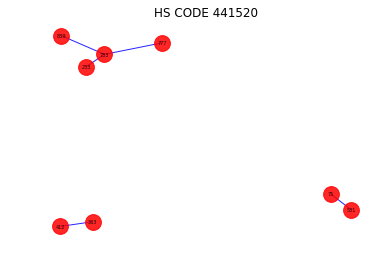

--------------------------------------------------------
HS code  441010  Number of nodes  6  Number of Edges  3
Number of Connected Components  3
Largest Component size  2
Smallest Component size  2


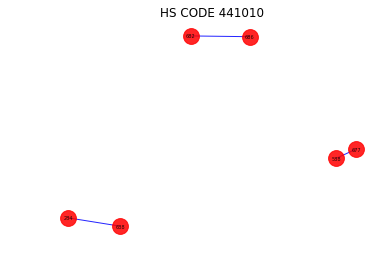

--------------------------------------------------------
HS code  440500  Number of nodes  4  Number of Edges  2
Number of Connected Components  2
Largest Component size  2
Smallest Component size  2


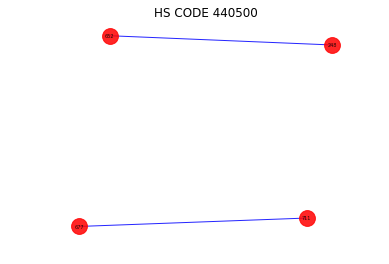

--------------------------------------------------------
HS code  441400  Number of nodes  5  Number of Edges  3
Number of Connected Components  2
Largest Component size  3
Smallest Component size  2


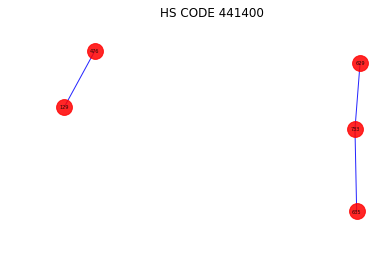

--------------------------------------------------------
HS code  440121  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


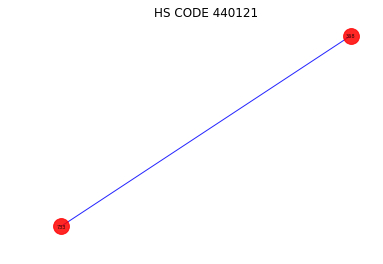

--------------------------------------------------------
HS code  440890  Number of nodes  8  Number of Edges  4
Number of Connected Components  4
Largest Component size  2
Smallest Component size  2


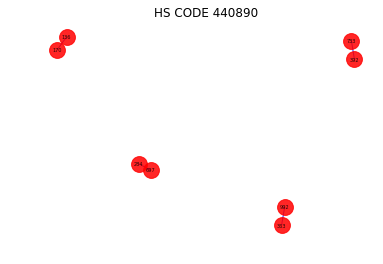

--------------------------------------------------------
HS code  44219  Number of nodes  121  Number of Edges  116
Number of Connected Components  12
Largest Component size  53
Smallest Component size  2


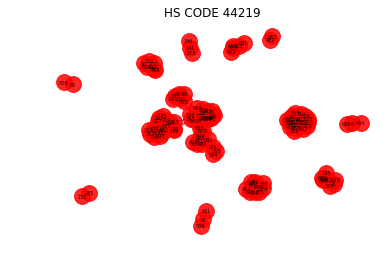

--------------------------------------------------------
HS code  44092  Number of nodes  487  Number of Edges  679
Number of Connected Components  5
Largest Component size  452
Smallest Component size  2


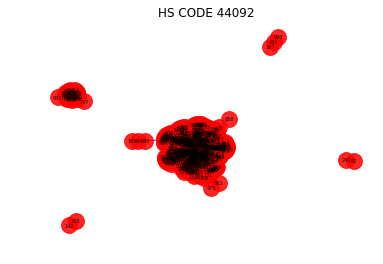

--------------------------------------------------------
HS code  491199  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


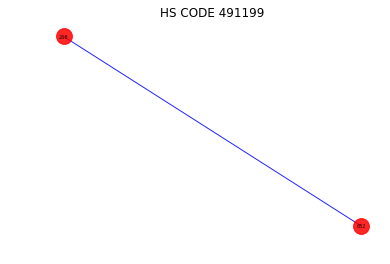

--------------------------------------------------------
HS code  440130  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


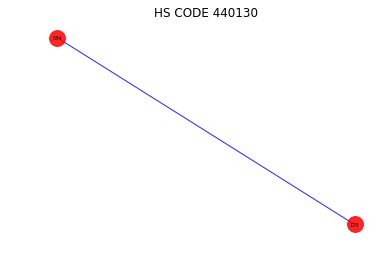

--------------------------------------------------------
HS code  442190  Number of nodes  120  Number of Edges  115
Number of Connected Components  12
Largest Component size  53
Smallest Component size  2


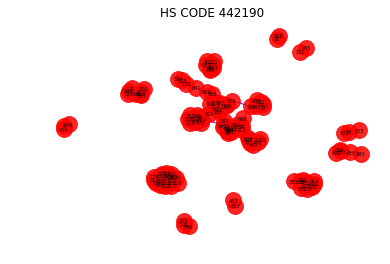

--------------------------------------------------------
HS code  440399  Number of nodes  14  Number of Edges  8
Number of Connected Components  6
Largest Component size  4
Smallest Component size  2


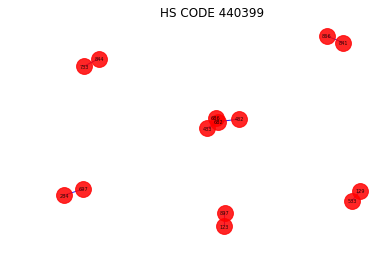

--------------------------------------------------------
HS code  441299  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


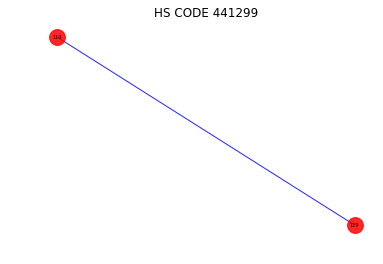

--------------------------------------------------------
HS code  440791  Number of nodes  70  Number of Edges  66
Number of Connected Components  9
Largest Component size  45
Smallest Component size  2


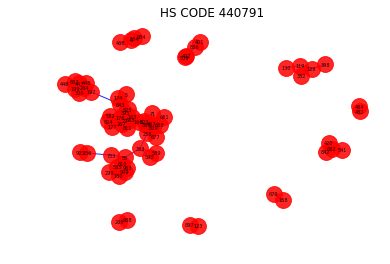

--------------------------------------------------------
HS code  440792  Number of nodes  4  Number of Edges  2
Number of Connected Components  2
Largest Component size  2
Smallest Component size  2


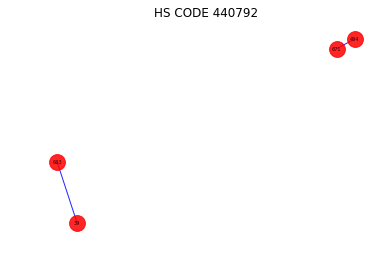

--------------------------------------------------------
HS code  440420  Number of nodes  6  Number of Edges  4
Number of Connected Components  2
Largest Component size  4
Smallest Component size  2


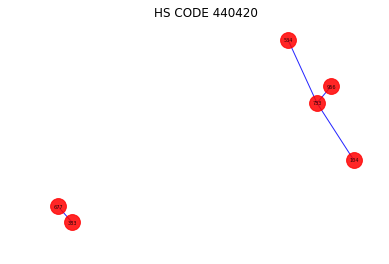

--------------------------------------------------------
HS code  441820  Number of nodes  35  Number of Edges  25
Number of Connected Components  10
Largest Component size  11
Smallest Component size  2


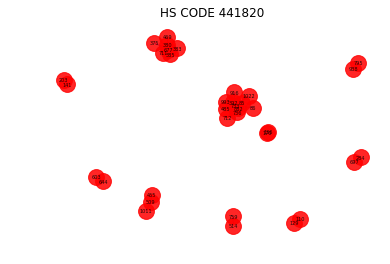

--------------------------------------------------------
HS code  440799  Number of nodes  55  Number of Edges  39
Number of Connected Components  17
Largest Component size  6
Smallest Component size  1


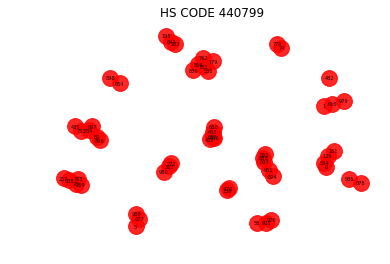

--------------------------------------------------------
HS code  441700  Number of nodes  14  Number of Edges  9
Number of Connected Components  5
Largest Component size  4
Smallest Component size  2


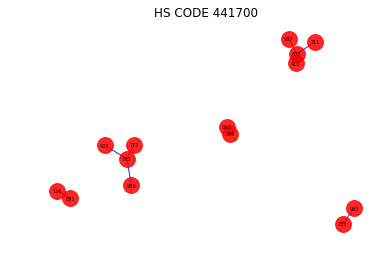

--------------------------------------------------------
HS code  441830  Number of nodes  4  Number of Edges  3
Number of Connected Components  1
Largest Component size  4
Smallest Component size  4


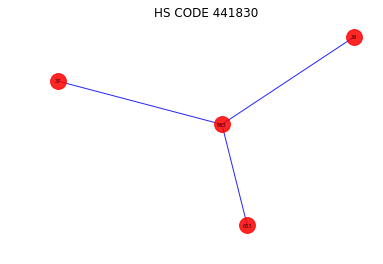

--------------------------------------------------------
HS code  440721  Number of nodes  4  Number of Edges  2
Number of Connected Components  2
Largest Component size  2
Smallest Component size  2


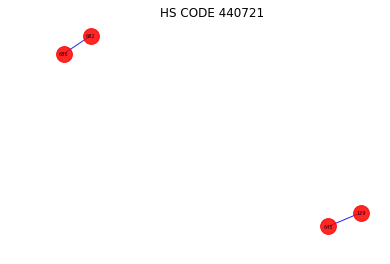

--------------------------------------------------------
HS code  440310  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


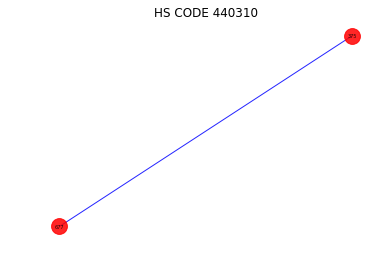

--------------------------------------------------------
HS code  442110  Number of nodes  2  Number of Edges  1
Number of Connected Components  1
Largest Component size  2
Smallest Component size  2


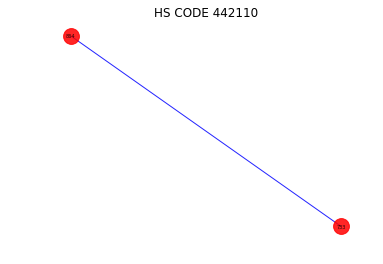

In [4]:
def analyze_5():

    df = get_df()
    all_hs_codes = set(df['hs_code'])

    # Local function
    def group_by_hs_code(tmp_df, hs_code):
        _tmp_df = pd.DataFrame(tmp_df,copy=True)
        # print '------------'
        # print '>> ',hs_code

        def _aux_filter(row, _hs):
            _hs = str(_hs)
            h = str(row['hs_code'])
            m = re.match(_hs, h)
            if m is not None and m.group(0) != '' :
                return _hs
            else :
                return None

        _tmp_df['hs_code'] = _tmp_df.apply(_aux_filter,axis = 1,_hs = hs_code )
        _tmp_df = _tmp_df[_tmp_df.hs_code.notnull()]

        if len(_tmp_df) == 0 :
            print tmp_df[tmp_df['hs_code']==int(_hs)]

        return _tmp_df



    for _hs in all_hs_codes :
        G = nx.Graph()
        
        tmp_df = pd.DataFrame(df,copy=True)
        tmp_df = group_by_hs_code(tmp_df,_hs)
        s = list(tmp_df['shipper_id'])
        c = list(tmp_df['consignee_id'])
        all_companies = list(set(s+c))
        
        
        # print  _hs, ' | ', len(tmp_df)

        for c, s in zip(s, c):
            if not G.has_node(c):
                G.add_node(c)
            if not G.has_node(s):
                G.add_node(s)
            if not G.has_edge(s, c):
                G.add_edge(s, c, weight=1)
            else:
                e = G.get_edge_data(s, c)
                count = e['weight']
                count += 1
                attr = {(s, c): {'weight': count}}
                nx.set_edge_attributes(G, attr)

        node_label_dict = {}
    
        for i in all_companies :
            node_label_dict[i] =  str(i)
        conn_c_count = 0
        _size =[]
        for i in nx.connected_components(G):
            conn_c_count += 1
            _size.append(len(i))
            
        print '--------------------------------------------------------'
        print 'HS code ', _hs, ' Number of nodes ',G.number_of_nodes(), ' Number of Edges ', G.number_of_edges()
        print 'Number of Connected Components ', conn_c_count
        print 'Largest Component size ', max(_size)
        print 'Smallest Component size ', min(_size)
        
        plt.figure()
        plt.title('HS CODE ' + str(_hs))
        nx.draw_spring(G,
                       node_size=250,
                       node_color='r',
                       edge_color='b',
                       alpha=0.85,
                       labels = node_label_dict,
                       font_size = 5
        )
        plt.show()



analyze_5()


In [22]:

import collections 

def sort_dict(d):
    sorted_x = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
    d1 = OrderedDict()
    for item in sorted_x:
        d1[item[0]] = item[1]
    return d1


df = get_df()

G = nx.Graph()
companies_c = list(df['consignee_id'])
companies_s = list(df['shipper_id'])

for c,s in zip(companies_c,companies_s):

    if not G.has_node(c):
        G.add_node(c)
    if not G.has_node(s):
        G.add_node(s)
    if not G.has_edge(s,c):
        G.add_edge(s,c,count = 1)
    else:
        e = G.get_edge_data(s,c)
        count = e['count']
        count += 1
        attr = { (s,c) : {'count': count} }
        nx.set_edge_attributes(G,attr )

print '-------------'
pprint.pprint('Number of nodes ' + str(G.number_of_nodes()) )
pprint.pprint('Number of edges ' + str(G.number_of_edges()) )
print '-------------'
bw_centrality = nx.betweenness_centrality(G)
bw_centrality = sort_dict(bw_centrality)
nx.set_node_attributes(G, bw_centrality, 'bw_centrality')


print '--------------'
print 'Betweenness Centrality Distribution (Histogram)'
data = [go.Histogram(
    x = bw_centrality.values(),
    histnorm = 'count'
)]

layout = go.Layout(
    title='Betweenness Centrality Distribution (Histogram)',
    xaxis=dict(
        title='Betweenness Centrality'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0,
)
iplot(data,layout)

print '-------------'
print 'Degree Distribution (Histogram)'

deg =  G.degree()
d = {}
for i in deg:
    d[i[0]] = i[1]
degree_sequence = sort_dict(d)

data = [go.Histogram(
    x = degree_sequence.values(),
    histnorm = 'count'
)]

layout = go.Layout(
    title='Degree Distribution (Histogram)',
    xaxis=dict(
        title='Degree'
    ),
    yaxis=dict(
        title='Count'
    ),
)
iplot(data,layout)

print '---------------'
print 'Clustering Coefficient Distribution (Histogram)'

clust_coeff = nx.clustering(G)
clust_coeff = sort_dict(clust_coeff) 
data = [go.Histogram(
    x = clust_coeff.values(),
    histnorm = 'count'
)]

layout = go.Layout(
    title='Clustering Coefficient Distribution (Histogram)',
    xaxis=dict(
        title='Clustering Coefficient'
    ),
    yaxis=dict(
        title='Count'
    ),
)
iplot(data,layout)


-------------
'Number of nodes 589'
'Number of edges 803'
-------------
--------------
Betweenness Centrality Distribution (Histogram)


-------------
Degree Distribution (Histogram)


---------------
Clustering Coefficient Distribution (Histogram)
